<a href="https://colab.research.google.com/github/sayan-iiitian/AI-ML-Projects/blob/main/Handwritten_Digit_Classification_using_Machine_Learning_Based_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
mnist = fetch_openml('mnist_784')
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0           0       0       0       0       0       0       0       0       0   
 1           0       0       0       0       0       0       0       0       0   
 2           0       0       0       0       0       0       0       0       0   
 3           0       0       0       0       0       0       0       0       0   
 4           0       0       0       0       0       0       0       0       0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995       0       0       0       0       0       0       0       0       0   
 69996       0       0       0       0       0       0       0       0       0   
 69997       0       0       0       0       0       0       0       0       0   
 69998       0       0       0       0       0       0       0       0       0   
 69999       0       0       0       0       0       0       0       0       0   
 
      

In [ ]:
x, y = mnist['data'], mnist['target']
print(x.shape)
print(type(x))
print(y.shape)
print(type(y))

(70000, 784)
<class 'pandas.core.frame.DataFrame'>
(70000,)
<class 'pandas.core.series.Series'>


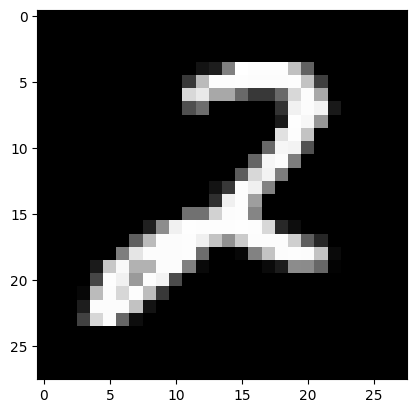


The Number is: 2


In [ ]:
x_new = x.to_numpy()[36001]
x_new_image = x_new.reshape(28, 28)
plt.imshow(x_new_image, cmap='gray')
plt.show()
print("\nThe Number is:", y[36001])

(60000, 784)
(10000, 784)
(60000,)
(10000,)

The Pixel Values are:

 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  67 232
  39   0   0   0   0   0   0   0   0   0  62  81   0   0   0   0   0   0
   0   0   0   0   0   0   0   0 120 180  39   0   0   0   0   0   0   0
   0   0 126 163   0   0   0   0   0   0   0   0   0   0   0   0   0   2
 153 210  40   0   0   0   0   0   0   0   0   0 220 16

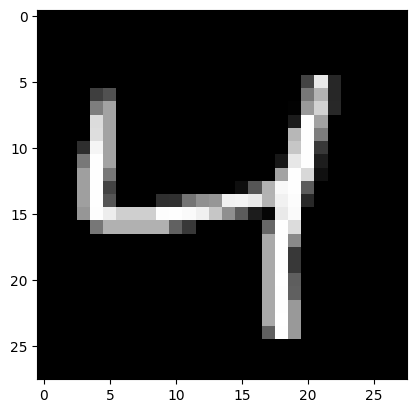


The Label or the Number is: 4


In [ ]:
x_train, x_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print("\nThe Pixel Values are:\n\n",x_train[2])
plt.imshow(x_train[2].reshape(28, 28), cmap = 'gray')
plt.show()
print("\nThe Label or the Number is:",y_train[2])

## Normalization

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Logistic Regression - Part 1

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Custom Logistic Regression Model using Batch Gradient Descent
class CustomLogisticRegression(BaseEstimator, ClassifierMixin):
    def __init__(self, learning_rate=0.01, epochs=5000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.theta = None
        self.bias = None
        self.cost_history = []

    def fit(self, X, y):
        m, n = X.shape
        self.theta = np.zeros(n)  # Initialize weights
        self.bias = 0  # Initialize bias
        y = y.astype(int)  # Ensure labels are integers

        for epoch in range(self.epochs):
            z = np.dot(X, self.theta) + self.bias
            predictions = sigmoid(z)
            # Compute gradients
            error = predictions - y
            d_theta = (1/m) * np.dot(X.T, error)  # Gradient for weights
            d_bias = (1/m) * np.sum(error)  # Gradient for bias
            # Update parameters
            self.theta -= self.learning_rate * d_theta
            self.bias -= self.learning_rate * d_bias

            # Compute cost (log loss)
            cost = (-1/m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
            self.cost_history.append(cost)

            # Print cost every 500 epochs
            if epoch % 500 == 0:
                print(f"Epoch {epoch}: Cost = {cost:.4f}")
        return self
    def predict(self, X):
        z = np.dot(X, self.theta) + self.bias
        return (sigmoid(z) >= 0.5).astype(int)  # Convert probabilities to binary labels

# Create and train the model (similar to log_reg)
log_reg = CustomLogisticRegression(learning_rate=0.01, epochs=5000)
log_reg.fit(x_train, y_train)

# Predict on test set
y_pred = log_reg.predict(x_test)
train_accuracy = accuracy_score(y_train.astype('int'), log_reg.predict(x_train))
print(f"Training Accuracy for logistic regression: {train_accuracy * 100:.2f}%")
# Evaluate accuracy
accuracy = accuracy_score(y_test.astype(int), y_pred)
print(f"Test Accuracy (Batch GD): {accuracy * 100:.2f}%")

Epoch 0: Cost = 0.6931


<ipython-input-7-bfafc0fbd940>:31: RuntimeWarning: divide by zero encountered in log
  cost = (-1/m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-7-bfafc0fbd940>:31: RuntimeWarning: invalid value encountered in multiply
  cost = (-1/m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
<ipython-input-7-bfafc0fbd940>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Epoch 500: Cost = nan
Epoch 1000: Cost = nan
Epoch 1500: Cost = nan
Epoch 2000: Cost = nan
Epoch 2500: Cost = nan
Epoch 3000: Cost = nan
Epoch 3500: Cost = nan
Epoch 4000: Cost = nan
Epoch 4500: Cost = nan
Training Accuracy for logistic regression: 11.10%
Test Accuracy (Batch GD): 11.10%


## Plotting Cost History

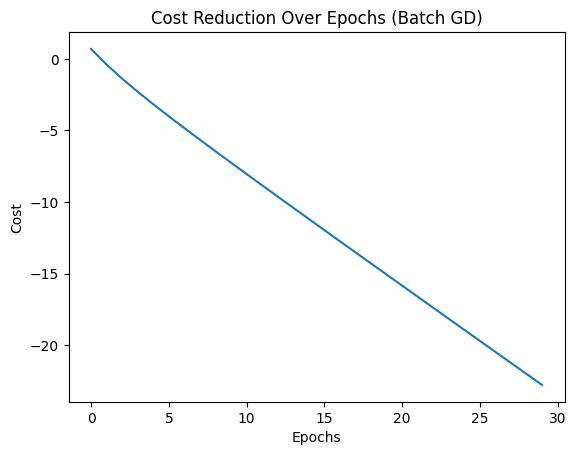

In [ ]:
plt.plot(log_reg.cost_history)
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.title("Cost Reduction Over Epochs (Batch GD)")
plt.show()

## Predictions

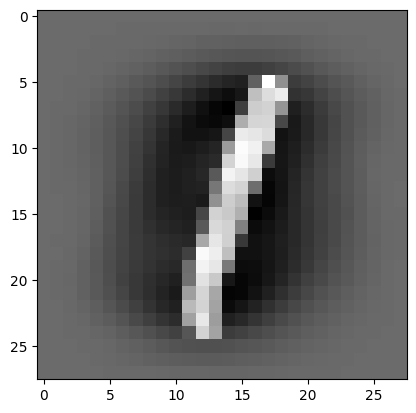


Predicted Number: 0


In [ ]:
plt.imshow(x_test[5].reshape(28, 28), cmap='gray')
plt.show()
print("\nPredicted Number:", log_reg.predict([x_test[5]])[0])

Classification Report:

              precision    recall  f1-score   support

           0       0.20      0.92      0.33       980
           1       0.04      0.18      0.06      1135
           2       0.00      0.00      0.00      1032
           3       0.00      0.00      0.00      1010
           4       0.00      0.00      0.00       982
           5       0.00      0.00      0.00       892
           6       0.00      0.00      0.00       958
           7       0.00      0.00      0.00      1028
           8       0.00      0.00      0.00       974
           9       0.00      0.00      0.00      1009

    accuracy                           0.11     10000
   macro avg       0.02      0.11      0.04     10000
weighted avg       0.02      0.11      0.04     10000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


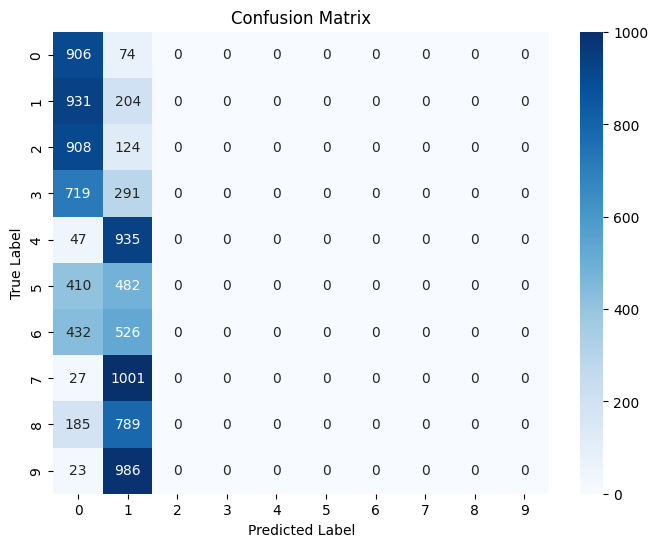

In [ ]:
# Classification Report
print("Classification Report:\n")
print(classification_report(y_test.astype('int'), y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test.astype('int'), y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

## Decision Tree

In [ ]:
# Initialize and Train Decision Tree
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(x_train, y_train.astype('int'))

# Predictions on Test Set
y_pred_dt = dt_clf.predict(x_test)
train_accuracy_dt = accuracy_score(y_train.astype('int'), dt_clf.predict(x_train))
print(f"Decision Tree Training Accuracy: {train_accuracy_dt * 100:.2f}")
# Evaluate Accuracy
accuracy_dt = accuracy_score(y_test.astype('int'), y_pred_dt)
print(f"Decision Tree Testing Accuracy: {accuracy_dt * 100:.2f}")

Decision Tree Training Accuracy: 100.00
Decision Tree Testing Accuracy: 87.55


## Predictions

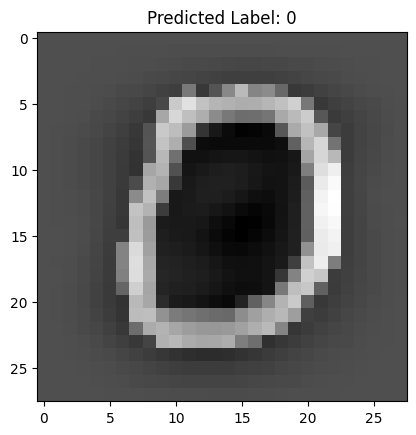

In [ ]:
# Predict on a Single Image
sample_image = x_test[10].reshape(28, 28)
sample_pred = dt_clf.predict(x_test[10].reshape(1, -1))[0]
plt.imshow(sample_image, cmap='gray')
plt.title(f"Predicted Label: {sample_pred}")
plt.show()


Decision Tree - Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       980
           1       0.95      0.96      0.95      1135
           2       0.86      0.86      0.86      1032
           3       0.83      0.85      0.84      1010
           4       0.86      0.87      0.87       982
           5       0.85      0.83      0.84       892
           6       0.90      0.88      0.89       958
           7       0.91      0.90      0.91      1028
           8       0.82      0.81      0.81       974
           9       0.85      0.85      0.85      1009

    accuracy                           0.88     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.88      0.88      0.88     10000



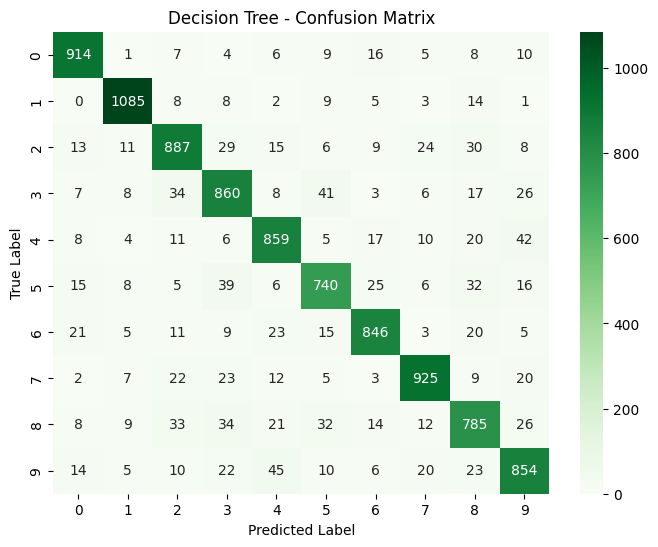

In [ ]:
# Classification Report
print("\nDecision Tree - Classification Report:\n")
print(classification_report(y_test.astype('int'), y_pred_dt))

# Confusion Matrix
cm_dt = confusion_matrix(y_test.astype('int'), y_pred_dt)

# Plot Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap="Greens", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Decision Tree - Confusion Matrix")
plt.show()

## Naive Bayes Classifier

In [ ]:
nb_clf = GaussianNB()
nb_clf.fit(x_train, y_train.astype('int'))

# Predictions on Test Set
y_pred_nb = nb_clf.predict(x_test)
train_accuracy_nb = accuracy_score(y_train.astype('int'), nb_clf.predict(x_train))
print(f"Naïve Bayes Training Accuracy: {train_accuracy_nb * 100:.2f}")
# Evaluate Accuracy
accuracy_nb = accuracy_score(y_test.astype('int'), y_pred_nb)
print(f"Naïve Bayes Testing Accuracy: {accuracy_nb * 100:.2f}")

Naïve Bayes Training Accuracy: 53.64
Naïve Bayes Testing Accuracy: 52.40


## Predictions

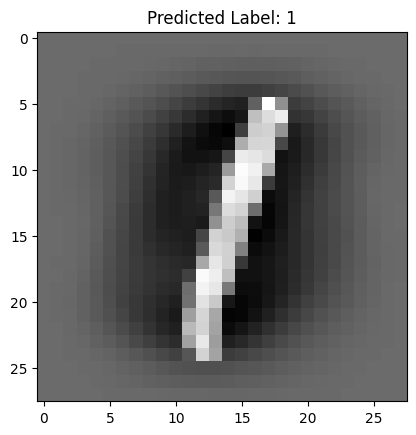

In [ ]:
sample_image_nb = x_test[5].reshape(28, 28)
sample_pred_nb = nb_clf.predict(x_test[5].reshape(1, -1))[0]
plt.imshow(sample_image_nb, cmap='gray')
plt.title(f"Predicted Label: {sample_pred_nb}")
plt.show()


Naïve Bayes - Classification Report:

              precision    recall  f1-score   support

           0       0.76      0.84      0.80       980
           1       0.89      0.94      0.91      1135
           2       0.90      0.18      0.29      1032
           3       0.65      0.28      0.39      1010
           4       0.86      0.13      0.23       982
           5       0.45      0.03      0.06       892
           6       0.69      0.92      0.79       958
           7       0.88      0.20      0.32      1028
           8       0.25      0.70      0.37       974
           9       0.36      0.95      0.53      1009

    accuracy                           0.52     10000
   macro avg       0.67      0.52      0.47     10000
weighted avg       0.68      0.52      0.48     10000



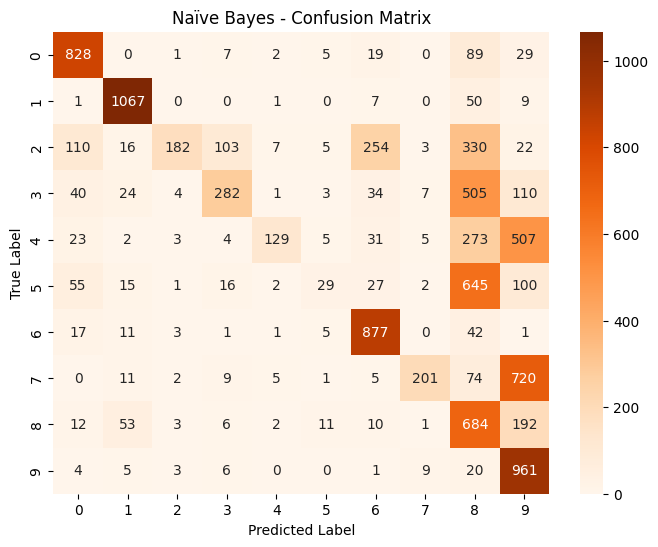

In [ ]:
# Classification Report
print("\nNaïve Bayes - Classification Report:\n")
print(classification_report(y_test.astype('int'), y_pred_nb))

# Confusion Matrix
cm_nb = confusion_matrix(y_test.astype('int'), y_pred_nb)

# Plot Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap="Oranges", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Naïve Bayes - Confusion Matrix")
plt.show()

## Logistic Regression - Part 2

In [ ]:
# Create Logistic Regression model with Stochastic Average Gradient Descent
log_reg = LogisticRegression(solver='saga', max_iter=5000, verbose=1, n_jobs=-1)
log_reg.fit(x_train, y_train.astype('int'))
y_pred = log_reg.predict(x_test)
# Evaluate accuracy
train_accuracy = accuracy_score(y_train.astype('int'), log_reg.predict(x_train))
print(f"Training Accuracy for logistic regression: {train_accuracy * 100:.2f}%")
accuracy = accuracy_score(y_test.astype('int'), y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 2882 epochs took 5366 seconds
Training Accuracy for logistic regression: 94.09%
Test Accuracy: 92.64%


## Predictions

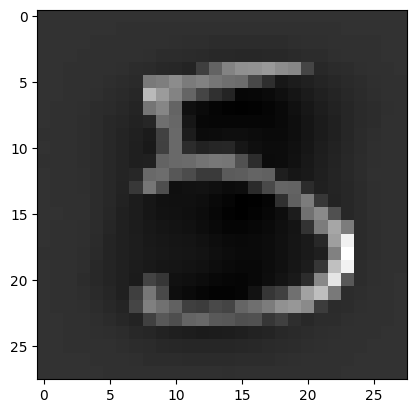


Predicted Number: 5


In [ ]:
plt.imshow(x_test[15].reshape(28, 28), cmap='gray')
plt.show()
print("\nPredicted Number:", log_reg.predict([x_test[15]])[0])

Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.89      0.91      1032
           3       0.91      0.91      0.91      1010
           4       0.94      0.93      0.94       982
           5       0.91      0.87      0.89       892
           6       0.94      0.95      0.95       958
           7       0.92      0.93      0.93      1028
           8       0.88      0.89      0.88       974
           9       0.91      0.92      0.92      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



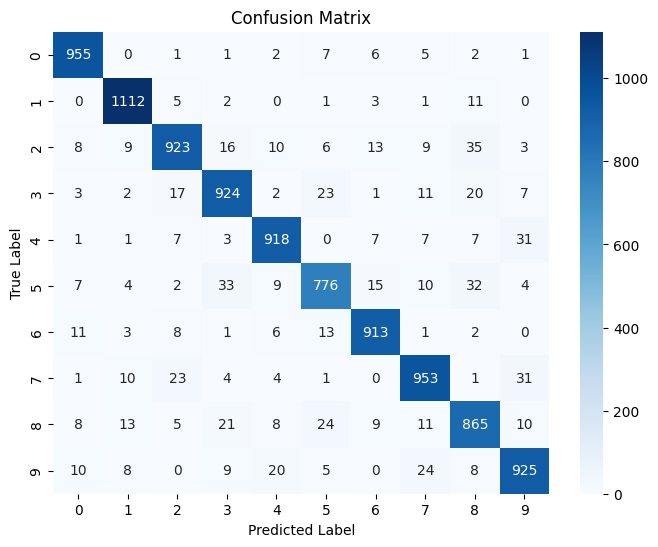

In [ ]:
# Classification Report
print("Classification Report:\n")
print(classification_report(y_test.astype('int'), y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test.astype('int'), y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()